In [1]:
from eicvibe.machine_portal.bend import Bend
from eicvibe.machine_portal.rbend import RBend
from eicvibe.machine_portal.drift import Drift
from eicvibe.machine_portal.quadrupole import Quadrupole
from eicvibe.machine_portal.sextupole import Sextupole
from eicvibe.machine_portal.octupole import Octupole
from eicvibe.machine_portal.rfcavity import RFCavity
from eicvibe.machine_portal.crabcavity import CrabCavity
from eicvibe.machine_portal.kicker import Kicker
from eicvibe.machine_portal.monitor import Monitor
from eicvibe.machine_portal.parameter_group import ParameterGroup   
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import yaml

In [5]:
d1= Drift(name="Drift1", length=1.0)
b1= Bend(name="Bend1", length=2.0)
b2= RBend(name="Bend2", length=2.0)
qf= Quadrupole(name="Quad1", length=0.6)
qd= Quadrupole(name="Quad2", length=0.6)


b1.add_parameter("BendP", "angle", np.pi/20)
b2.add_parameter("BendP", "angle", np.pi/20)

qf.add_parameter("MagneticMultipoleP", "kn1", 1.2)
qd.add_parameter("MagneticMultipoleP", "kn1", -1.2)

qf.add_parameter("ApertureP", "X", [-0.05,0.05])

sf = Sextupole(name="Sext1", length=0.4)
sf.add_parameter("MagneticMultipoleP", "kn2", 0.8)

sd = Sextupole(name="Sext2", length=0.4)
sd.add_parameter("MagneticMultipoleP", "kn2", -0.8)

oc = Octupole(name="Oct1", length=0.4)
oc.add_parameter("MagneticMultipoleP", "kn3", 0.4)

rf = RFCavity(name="RF1", length=0.5)
rf.add_parameter("RFP", "voltage", 1.0)

crab = CrabCavity(name="Crab1", length=0.5)
crab.add_parameter("RFP", "voltage", 0.1)

kicker = Kicker(name="Kicker1", length=0.1)
kicker.add_parameter("KickerP", "hkick", 0.05)

moni = Monitor(name="Monitor1", length=0.0)

In [6]:
yaml_str = '''
Quadrupole:
  length: 1.0
  MagneticMultipoleP:
    Kn1: -1.0'''

yaml_dict = yaml.safe_load(yaml_str)
print(yaml.safe_dump(qf.to_yaml_dict(), default_flow_style=False, sort_keys=False))

Quadrupole:
  name: Quad1
  length: 0.6
  ApertureP:
    X:
    - -0.05
    - 0.05



TypeError: '>' not supported between instances of 'NoneType' and 'int'

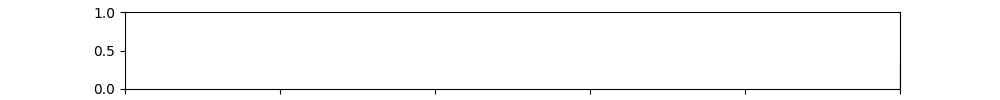

In [7]:
fig, ax = plt.subplots(figsize=(10, 1))
cell = [d1, b1, d1, qf, sf, d1, b2, d1, moni, d1, kicker, qd, sd, d1, oc, d1, rf, rf, rf, rf, d1, crab, d1]
ring = cell * 8
sloc=0.0
for element in ring:
    #print(element.name, element.type, element.length, sloc)
    sloc=element.plot_in_beamline(ax, sloc, normalized_strength=None)

ax.set_xlim(0, sloc)
ax.set_ylim(-1, 1)


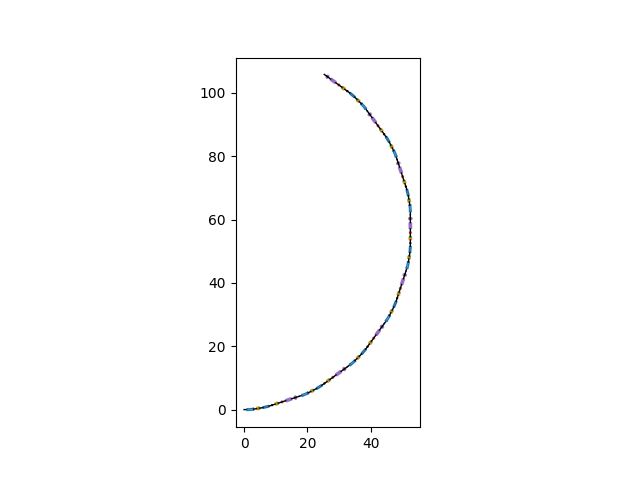

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
initial_xy = [0, 0]
initial_vector = [np.cos(np.pi/5000),np.sin(np.pi/5000)]  
for element in ring:
    initial_xy, initial_vector=element.plot_in_floorplan(ax, initial_xy, initial_vector)

In [8]:
# Test the cleaned-up RBend implementation
import sys

# Clear modules to get updated RBend implementation
modules_to_clear = [m for m in sys.modules.keys() if m.startswith('eicvibe')]
for module in modules_to_clear:
    del sys.modules[module]

from eicvibe.machine_portal.rbend import RBend
from eicvibe.machine_portal.parameter_group import ParameterGroup

print("=== Testing Cleaned-up RBend ===")

# Test basic functionality
try:
    print("1. Testing basic RBend creation and consistency check...")
    rbend_test = RBend("test_rbend", "RBend", 2.0)
    bend_params = ParameterGroup('BendP', 'BendP')
    bend_params.add_parameter('angle', 0.1)
    rbend_test.add_parameter_group(bend_params)
    
    print(f"  Before: length={rbend_test.length}, angle={bend_params.get_parameter('angle')}")
    rbend_test.check_consistency()
    print(f"  After: length={rbend_test.length}, angle={bend_params.get_parameter('angle')}, chord={bend_params.get_parameter('chord_length')}")
    print("  ✅ Basic functionality works")
    
except Exception as e:
    print(f"  ❌ Basic test failed: {e}")

# Test zero angle case
try:
    print("\n2. Testing zero angle case...")
    rbend_zero = RBend("zero_rbend", "RBend", 3.0)
    bend_params_zero = ParameterGroup('BendP', 'BendP')
    bend_params_zero.add_parameter('angle', 0.0)
    rbend_zero.add_parameter_group(bend_params_zero)
    
    print(f"  Before: length={rbend_zero.length}, angle={bend_params_zero.get_parameter('angle')}")
    rbend_zero.check_consistency()
    print(f"  After: length={rbend_zero.length}, angle={bend_params_zero.get_parameter('angle')}, chord={bend_params_zero.get_parameter('chord_length')}")
    print("  ✅ Zero angle case works")
    
except Exception as e:
    print(f"  ❌ Zero angle test failed: {e}")

# Test chord length calculation
try:
    print("\n3. Testing chord length given...")
    rbend_chord = RBend("chord_rbend", "RBend", 0.0)
    bend_params_chord = ParameterGroup('BendP', 'BendP')
    bend_params_chord.add_parameter('angle', 0.2)
    bend_params_chord.add_parameter('chord_length', 1.5)
    rbend_chord.add_parameter_group(bend_params_chord)
    
    print(f"  Before: length={rbend_chord.length}, angle={bend_params_chord.get_parameter('angle')}, chord={bend_params_chord.get_parameter('chord_length')}")
    rbend_chord.check_consistency()
    print(f"  After: length={rbend_chord.length}, angle={bend_params_chord.get_parameter('angle')}, chord={bend_params_chord.get_parameter('chord_length')}")
    print("  ✅ Chord length calculation works")
    
except Exception as e:
    print(f"  ❌ Chord length test failed: {e}")

print("\n=== RBend Cleanup Test Complete ===")# When is check_consistency called?
print("=== When check_consistency is Called ===")

print("Currently, check_consistency() is NOT automatically called in the EICViBE framework.")
print("It is a manual validation method that developers can use to verify element integrity.")
print()

print("1. MANUAL VALIDATION - Current Usage:")
print("   - Called explicitly by developers during testing")
print("   - Used to validate elements after construction/modification")
print("   - Called in test notebooks and validation scripts")
print()

# Example 1: Manual consistency check
print("Example 1: Manual consistency check on existing elements")
try:
    qf.check_consistency()  # This will fail because qf is missing kn1
    print("✅ qf consistency check passed")
except Exception as e:
    print(f"❌ qf consistency check failed: {e}")

try:
    qd.check_consistency()  # This should pass
    print("✅ qd consistency check passed")
except Exception as e:
    print(f"❌ qd consistency check failed: {e}")

print()
print("2. POTENTIAL AUTOMATIC CALL POINTS (not currently implemented):")
print("   - During element construction (__post_init__)")
print("   - Before simulation/calculation operations")
print("   - During lattice assembly/validation")
print("   - When adding/modifying parameter groups")
print()

print("3. CURRENT DESIGN BENEFITS:")
print("   - Performance: No overhead during normal operations")
print("   - Flexibility: Developers choose when to validate")
print("   - Debugging: Explicit validation helps identify issues")
print()

print("4. WHERE IT'S CURRENTLY CALLED:")
print("   - Test notebooks (like this one)")
print("   - Validation scripts")
print("   - Quality assurance routines")
print("   - Manual debugging sessions")

print("\n=== check_consistency Call Analysis Complete ===")

=== When check_consistency is Called ===
Currently, check_consistency() is NOT automatically called in the EICViBE framework.
It is a manual validation method that developers can use to verify element integrity.

1. MANUAL VALIDATION - Current Usage:
   - Called explicitly by developers during testing
   - Used to validate elements after construction/modification
   - Called in test notebooks and validation scripts

Example 1: Manual consistency check on existing elements
❌ qf consistency check failed: Quadrupole element must have a MagneticMultipoleP group with a K1 parameter set.
✅ qd consistency check passed

2. POTENTIAL AUTOMATIC CALL POINTS (not currently implemented):
   - During element construction (__post_init__)
   - Before simulation/calculation operations
   - During lattice assembly/validation
   - When adding/modifying parameter groups

3. CURRENT DESIGN BENEFITS:
   - Performance: No overhead during normal operations
   - Flexibility: Developers choose when to validate
